In [6]:
using Plots
include("TuningCurvePortal.jl");
include("TuningCurvePlot.jl");

In [3]:
target_name = "ts6_SC_180401_GBL"
(spike_trains, marker, stim_info) = TuningCurvePortal.getTargetData(target_name)

responses = [(name, TuningCurvePortal.trimIntoAverageFiringRate(train, marker, stim_info))
             for (name, train) in spike_trains]
tuningcurve_set = [(name, TuningCurvePortal.getTuningCurve(response_set))
                   for (name, response_set) in responses]
"processed data"

"processed data"

In [7]:
chart_dir = joinpath("data/CHART",target_name)
isdir(chart_dir)?nothing:mkdir(chart_dir)

for idx = 1:length(spike_trains)
    unit_response = responses[idx][2]
    unit_tuningcurve = tuningcurve_set[idx][2]
    
    # GB plot
    plot()
    plot_green = TuningCurvePlot.plotResponseOfTrial(unit_response, unit_tuningcurve, :greens, palette=:greens, name="greens")
    plot_blue  = TuningCurvePlot.plotResponseOfTrial(unit_response, unit_tuningcurve, :blues, palette=:blues, name="blues")
    tplot_green = TuningCurvePlot.plotTuningCurveScatter(unit_tuningcurve, [:green], name="greens")
    tplot_breen = TuningCurvePlot.plotTuningCurveScatter(unit_tuningcurve, [:blue], name="blues")
    
    a = plot(plot_green, plot_blue, layout=(2,1), size=(1000,1000))
    b = plot(tplot_green, tplot_breen, layout=(2,1), size=(1000,1000))
    x = plot(a, b, size=(1500,1200))
    #savefig(joinpath(chart_dir, target_name*"_"*responses[idx][1]*"_GBcurve.png"))
    
    # L plot
    plot()
    cg = TuningCurvePlot.collapseHeatMap(unit_tuningcurve,2,color=:green, name="L-greens")
    cb = TuningCurvePlot.collapseHeatMap(unit_tuningcurve,1,color=:blue, name="L-blues")
    ht = TuningCurvePlot.plotTuningHeatMap(unit_tuningcurve)
    ht2 = TuningCurvePlot.plotTuningHeatMap(unit_tuningcurve)
    
    a = plot(cg, cb, layout=(2,1))
    b = plot(ht, ht2, layout=(2,1))
    y = plot(a,b, size=(1000,1000))
    #savefig(joinpath(chart_dir, target_name*"_"*responses[idx][1]*"_tuningcv.png"))
    
    # combine and export
    plot(x,y,size=(2000,1000))
    savefig(joinpath(chart_dir, target_name*"_"*responses[idx][1]*"_summary_0_4.png"))
end
"ok"

"ok"

## archive

In [173]:
chart_dir = joinpath("data/CHART",target_name)
isdir(chart_dir)?nothing:mkdir(chart_dir)

for idx = 1:length(spike_trains)
    unit, unit_train = spike_trains[idx]
    length(unit_train)==0?continue:nothing  #skip the empty train.
    unit_response = TuningCurvePortal.trimIntoAverageFiringRate(spike_trains[idx][2], marker, stim_info)
    unit_tuningcurve = TuningCurvePortal.getTuningCurve(unit_response)
    
    plot_green = plotResponseOfTrial(unit_response, unit_tuningcurve, :greens, palette=:greens)
    plot_blue = plotResponseOfTrial(unit_response, unit_tuningcurve, :blues, palette=:blues)
    tplot_green = plotTuningCurveScatter(unit_tuningcurve, [:green])
    tplot_breen = plotTuningCurveScatter(unit_tuningcurve, [:blue])
    
    a = plot(plot_green, plot_blue, layout=(2,1), size=(1000,1000))
    b = plot(tplot_green, tplot_breen, layout=(2,1), size=(1000,1000))
    
    plot(a, b, size=(1500,1200))
    savefig(joinpath(chart_dir, target_name*"_"*unit*"_GBcurve.png"))
    
    cg = collapseHeatMap(unit_tuningcurve,2,color=:green)
    cb = collapseHeatMap(unit_tuningcurve,1,color=:blue)
    ht = plotTuningHeatMap(unit_tuningcurve)
    ht2 = plotTuningHeatMap(unit_tuningcurve)
    
    a = plot(cg, cb, layout=(2,1))
    b = plot(ht, ht2, layout=(2,1))
    plot(a,b, size=(1000,1000))
    savefig(joinpath(chart_dir, target_name*"_"*unit*"_Lmap.png"))
    
    #break
    # TODO: luminance reaction
    println("processed: "*unit)
end

LoadError: [91mBoundsError[39m

## GB only

In [176]:
chart_dir = joinpath("CHART",target_name)
isdir(chart_dir)?nothing:mkdir(chart_dir)

for idx = 1:length(spike_trains)
    unit, unit_train = spike_trains[idx]
    length(unit_train)==0?continue:nothing  #skip the empty train.
    unit_response = TuningCurvePortal.trimIntoAverageFiringRate(spike_trains[idx][2], marker, stim_info)
    unit_tuningcurve = TuningCurvePortal.getTuningCurve(unit_response)
    
    plot_green = plotResponseOfTrial(unit_response, unit_tuningcurve, :greens, palette=:greens)
    #plot_green = plot!(title="mean approximate firing rate for G1-G8 of "*unit)
    #savefig(joinpath(chart_dir, target_name*"_"*unit*"_greens.png"))
    
    plot_blue = plotResponseOfTrial(unit_response, unit_tuningcurve, :blues, palette=:blues)
    #plot_blue = plot!(title="mean approximate firing rate for B1-B8 of "*unit)
    #savefig(joinpath(chart_dir, target_name*"_"*unit*"_blues.png"))
    
    a = plot(plot_green, plot_blue, layout=(2,1), size=(1000,1000))
    
    tplot_green = plotTuningCurveScatter(unit_tuningcurve, [:green])
    tplot_breen = plotTuningCurveScatter(unit_tuningcurve, [:blue])
    b = plot(tplot_green, tplot_breen, layout=(2,1), size=(1000,1000))
    
    plot(a, b, size=(1500,1200))
    savefig(joinpath(chart_dir, target_name*"_"*unit*"_tuning.png"))
    #break
    # TODO: luminance reaction
    println("processed: "*unit)
end

processed: WBC15a
processed: WBC02b
processed: WBC08a
processed: WBC08b
processed: WBC06a
processed: WBC04a
processed: WBC14b
processed: WBC09a
processed: WBC02a
processed: WBC14a


# L only

In [178]:
chart_dir = joinpath("CHART",target_name)
isdir(chart_dir)?nothing:mkdir(chart_dir)

for idx = 1:length(spike_trains)
    unit, unit_train = spike_trains[idx]
    length(unit_train)==0?continue:nothing  #skip the empty train.
    unit_response = TuningCurvePortal.trimIntoAverageFiringRate(spike_trains[idx][2], marker, stim_info)
    unit_tuningcurve = TuningCurvePortal.getTuningCurve(unit_response)
    
    cg = collapseHeatMap(unit_tuningcurve,2,color=:green)
    cb = collapseHeatMap(unit_tuningcurve,1,color=:blue)
    ht = plotTuningHeatMap(unit_tuningcurve)
    ht2 = plotTuningHeatMap(unit_tuningcurve)
    
    a = plot(cg, cb, layout=(2,1))
    b = plot(ht, ht2, layout=(2,1))
    plot(a,b, size=(1000,1000))
    savefig(joinpath(chart_dir, target_name*"_"*unit*"_tuningcv.png"))
    # TODO: luminance reaction
    println("processed: "*unit)
end

processed: WBC15a
processed: WBC02b
processed: WBC08a
processed: WBC05a
processed: WBC06a
processed: WBC04a
processed: WBC14b
processed: WBC09a
processed: WBC02a
processed: WBC14a


# test field

In [111]:
ur = TuningCurvePortal.trimIntoAverageFiringRate(spike_trains[1][2], marker, stim_info)
ut = ur |> TuningCurvePortal.getTuningCurve

16-element Array{Tuple{Symbol,Int64,Float64},1}:
 (:blue, 1, 6.24983) 
 (:blue, 2, 7.62075) 
 (:blue, 3, 6.7552)  
 (:blue, 4, 10.2465) 
 (:blue, 5, 11.9657) 
 (:blue, 6, 13.269)  
 (:blue, 7, 11.2749) 
 (:blue, 8, 14.4157) 
 (:green, 1, 6.6484) 
 (:green, 2, 9.03794)
 (:green, 3, 10.8553)
 (:green, 4, 9.75684)
 (:green, 5, 12.1219)
 (:green, 6, 16.2989)
 (:green, 7, 13.4779)
 (:green, 8, 15.5346)


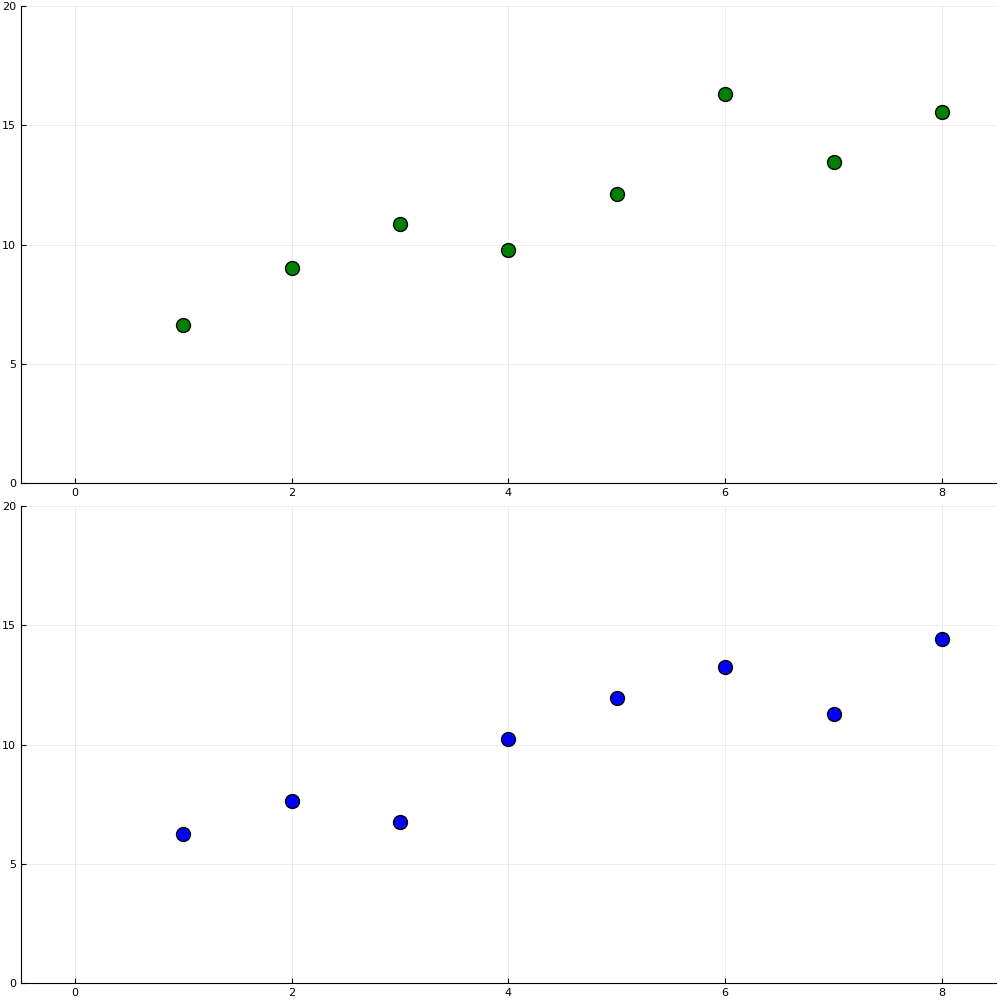

In [116]:
tg = plotTuningCurveScatter(ut, [:green])
tb = plotTuningCurveScatter(ut, [:blue])
plot(tg, tb, layout=(2,1),size=(1000,1000))


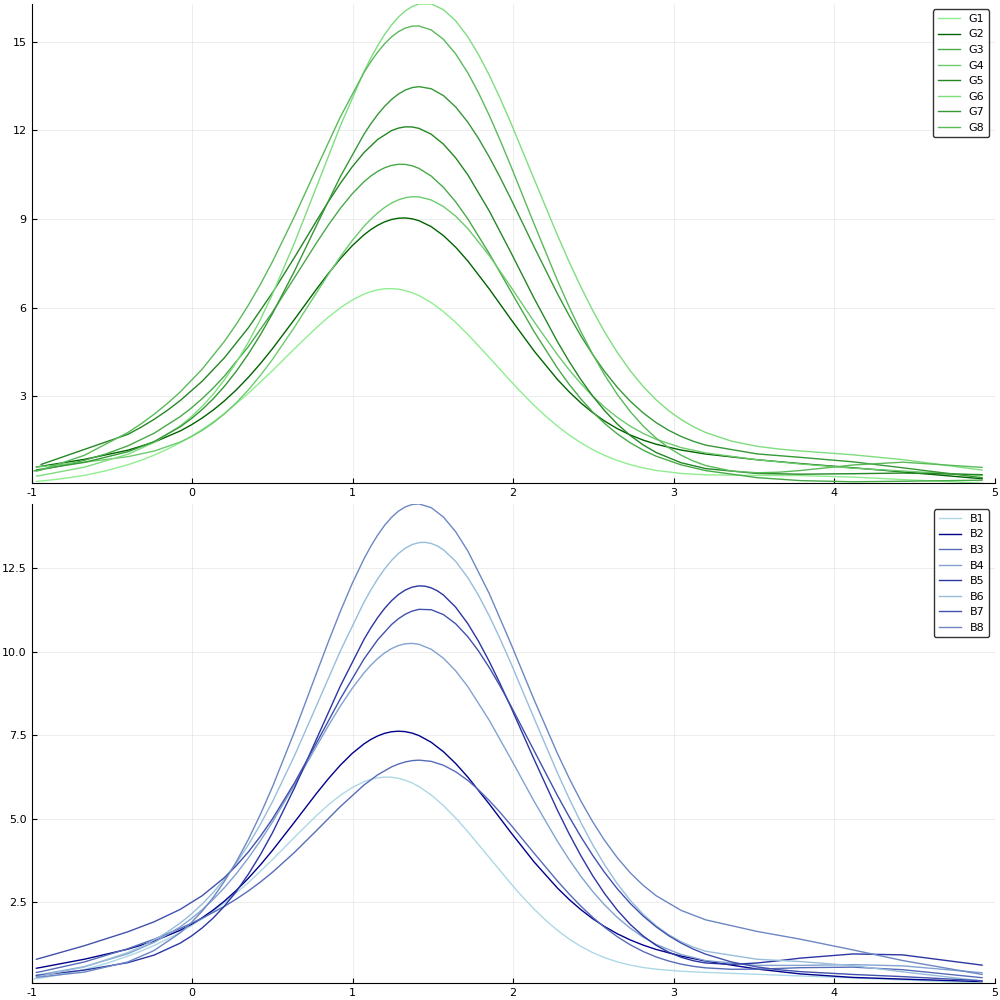

In [109]:
pg = plotResponseOfTrial(ur, :greens, palette=:greens)
pb = plotResponseOfTrial(ur, :blues, palette=:blues)
plot(pg, pb, layout=(2,1),size=(1000,1000))